## NTU Let us Fridge analysis 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import regex as re


In [2]:
# df = pd.read_excel(r"C:\Personal Work\Personal Projects\Data\PacMan Tracking Sheet.xlsx", sheet_name = 0, header = 2, usecols = 'A:K', skiprows = 0, nrows = 16)
df = pd.read_excel(r"C:\Personal Work\Personal Projects\Data\PacMan Tracking Sheet.xlsx", sheet_name = 0, header = None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
3,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
4,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
5,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
6,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
7,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
8,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
9,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN


In [4]:
# filt = df[0] == 'Fridge_Brand '
# df[filt]


df_filter_header1 = df[0] == 'Fridge_Brand '
df_filter_header2 = df[0] == 'Router_Brand'

df[df_filter_header1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN


In [5]:
df[df_filter_header2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
25,Router_Brand,Router_Id,Router_Type,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,Sold to,Transferred to Keith,NaN


In [6]:
print(df[df_filter_header1].index[0])
print(df[df_filter_header2].index[0])

#This is to get the first fridge df 
#this is the dataframe object that i want df.iloc[2:25, :]
Fridge_df = pd.DataFrame(df.iloc[2:25, :].values, columns = df.iloc[2:25, :].columns)
df.iloc[2:25, :]

2
25


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
3,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
4,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
5,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
6,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
7,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
8,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
9,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
10,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
11,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [7]:
print(df.index.max())
print(df[df_filter_header2].index[0])

#This is to get the router df 
Router_df = df.iloc[25:41, :]
Router_df

41
25


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
25,Router_Brand,Router_Id,Router_Type,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,Sold to,Transferred to Keith,NaN
26,TPLink,1,AC750,White,NaN,@mollylaa1,Aiden,Aiden,10,30,Aiden,NaN,zy,Yes,NaN
27,NaN,2,TL-WR840N,White,NaN,@joannensh,Aiden,Keith,13,20,Aiden,NaN,Sold,Not I receive,NaN
28,NaN,3,TL-WR840N,White,NaN,@atm174,Jun Hoe,Jun Hoe,10,20,Aiden,NaN,Sold,Not I receive,NaN
29,NaN,4,TL-WR840N,White,NaN,@yrinamandarina,Jun Hoe,Keith,7,20,Aiden,NaN,Sold,Not I receive,NaN
30,NaN,5,AC1200,White,NaN,@yrinamandarina,Jun Hoe,Keith,8,35,Aiden,NaN,Daniel,Yes,NaN
31,NaN,6,Archer - C6,White,NaN,@teapernar,Aiden,Keith,5,20,Keith,NaN,NaN,NaN,NaN
32,NaN,7,AC750,White,NaN,@rahdogking,Jun Hoe,Jun Hoe,10,25,Aiden,NaN,Chi Nguyen,Yes,NaN
33,NaN,8,AC750,White,NaN,@Sofia_n17,Aiden,Aiden,10,25,Aiden,NaN,Xin Wei Tan,Yes,NaN
34,NaN,9,Archer - AX24,Black,NaN,@albru11,Jun Hoe,Aiden,10,70,Aiden,NaN,Minh Thien,Yes,NaN


## Fridge Data Breakdown 



In [8]:
#I am dropping the rows that have all nan values
Fridge_df.dropna(axis = 0, how = 'all', inplace = True)
Fridge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [9]:
# #renaming the colunmns 
# Fridge_df.drop(index = [17,18,21], inplace = True)
# rename_dict = {df.columns[i]: Fridge_df.iloc[0,:][i] for i in range(len(Fridge_df.columns))}
# Fridge_df.rename(columns = rename_dict, inplace = True)

# Fridge_df.drop(axis = 0, index = 0, inplace = True)

In [10]:
Fridge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [11]:
filt = Fridge_df[0] == 'Fridge_Brand '
Fridge_df[filt].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
 1   1       1 non-null      object
 2   2       1 non-null      object
 3   3       1 non-null      object
 4   4       1 non-null      object
 5   5       1 non-null      object
 6   6       1 non-null      object
 7   7       1 non-null      object
 8   8       1 non-null      object
 9   9       1 non-null      object
 10  10      1 non-null      object
 11  11      0 non-null      object
 12  12      0 non-null      object
 13  13      0 non-null      object
 14  14      0 non-null      object
dtypes: object(15)
memory usage: 128.0+ bytes



q: How to remove cells that have many NaN values 

s:
Here's the code that you can use:
To remove rows that have many NaN values, you can use the `dropna()` method of the DataFrame with the `thresh` parameter. The `thresh` parameter specifies the minimum number of non-null values required for a row to be kept.

```python
Fridge_df.dropna(thresh=len(Fridge_df.columns) - $PLACEHOLDER$, inplace=True)
```

Replace `$PLACEHOLDER$` with the desired threshold value. This code will drop rows that have fewer non-null values than the specified threshold.


In [26]:
Fridge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [35]:
#Check the majority values for the notna
Fridge_df.notna().sum(axis = 1)

0     11
1     10
2      9
3      9
4      9
5      9
6     10
7      9
8      9
9      9
10     9
11     9
12     9
13    10
14     9
15    10
16     9
17     3
18     2
21     1
dtype: int64

In [39]:
#drop the rows that have many NaN values, thresh is based on the values above 
Fridge_df.dropna(thresh = 9, inplace = True)
Fridge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [40]:
#Trim the values first 
filt = Fridge_df[0] == 'Fridge_Brand '
Fridge_df[filt] = Fridge_df[filt].apply(lambda x: x.str.strip(), axis = 0)
Fridge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN


In [58]:
#Rename the columns 
Fridge_df.iloc[0, :]

#Optimized 
Fridge_df.rename(columns=lambda x: Fridge_df.iloc[0][x], inplace=True)

In [63]:
#Drop the row that is same as the column name 
filt = Fridge_df['Fridge_Brand'] == 'Fridge_Brand'
Fridge_df.drop(index = Fridge_df[filt].index , inplace = True)

In [64]:
Fridge_df

,Fridge_Brand,Fridge_Id,Fridge_Type (Basic or Bar fridge),Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman,NaN,NaN,NaN,NaN
1,Midea,1,NaN,White,1,@tse_ryan,Keith,Max,40,100,Max,NaN,NaN,NaN,NaN
2,NaN,2,NaN,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden,NaN,NaN,NaN,NaN
3,NaN,3,NaN,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max,NaN,NaN,NaN,NaN
4,NaN,4,NaN,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe,NaN,NaN,NaN,NaN
5,NaN,5,NaN,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden,NaN,NaN,NaN,NaN
6,PowerPac,6,NaN,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith,NaN,NaN,NaN,NaN
7,NaN,7,NaN,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden,NaN,NaN,NaN,NaN
8,NaN,8,NaN,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith,NaN,NaN,NaN,NaN
9,NaN,9,NaN,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe,NaN,NaN,NaN,NaN
10,NaN,10,NaN,Grey,0.5,@atm174,Jun Hoe,Jun Hoe,45,120,Aiden,NaN,NaN,NaN,NaN


In [65]:
#check for duplicated values 
Fridge_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True])

In [67]:
#remove last 3 nan column from the tail
#Fridge_df.drop(columns = Fridge_df.columns[-3:], inplace = True)

#or

Fridge_df.dropna(axis = 1, how = 'all', inplace = True)

#remember to reset index after dropping 
Fridge_df.reset_index(drop = True, inplace = True)

In [68]:
Fridge_df

,Fridge_Brand,Fridge_Id,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman
1,Midea,1,White,1,@tse_ryan,Keith,Max,40,100,Max
2,NaN,2,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden
3,NaN,3,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max
4,NaN,4,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe
5,NaN,5,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden
6,PowerPac,6,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith
7,NaN,7,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden
8,NaN,8,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith
9,NaN,9,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe
10,NaN,10,Grey,0.5,@atm174,Jun Hoe,Jun Hoe,45,120,Aiden


In [79]:
#THis renames all the Nan Values for the "Fridge_Brand" to the brand names 
#Github Optimized
Brand_Placeholder = None

# Iterate through each row using range and len
for i in range(len(Fridge_df)):
    current_value = Fridge_df.iloc[i]['Fridge_Brand']
    
    if i == 0:
        Brand_Placeholder = current_value
    elif pd.isna(current_value):
        Fridge_df.at[i, 'Fridge_Brand'] = Brand_Placeholder
    elif pd.notna(current_value) and current_value != Brand_Placeholder:
        Brand_Placeholder = current_value


In [80]:
Fridge_df.columns

Index(['Fridge_Brand', 'Fridge_Id', 'Colour', 'Years_Used', 'Previous_Owner',
       'Who_Bought_It', 'Storage_Room', 'Bought_Amount', 'Sales_Amount',
       'Salesman'],
      dtype='object')

In [81]:
Fridge_df

,Fridge_Brand,Fridge_Id,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman
0,Midea,1,White,1,@tse_ryan,Keith,Max,40,100,Max
1,Midea,2,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden
2,Midea,3,Grey,3,@joqjy,Aiden,Jun Hoe,30,100,Max
3,Midea,4,White,1.5,@dhn_strkr,Aiden,Jun Hoe,50,100,Jun Hoe
4,Midea,5,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden
5,PowerPac,6,Grey,2,@Kendrickkohh,Aiden,Aiden,50,100,Keith
6,PowerPac,7,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden
7,PowerPac,8,Grey,0.5,@matildanordkv,Keith,Keith,30,100,Keith
8,PowerPac,9,Black,0.33,@abcdsjm,Keith,Max,50,110,Jun Hoe
9,PowerPac,10,Grey,0.5,@atm174,Jun Hoe,Jun Hoe,45,120,Aiden


In [86]:
Fridge_GroupBy_df = Fridge_df.groupby(by = 'Salesman', axis = 0)

In [83]:
#strip for cell values is data type is string
Fridge_df.applymap(lambda x: x.strip() if isinstance(x, str) else None)


,Fridge_Brand,Fridge_Id,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman
0,Midea,None,White,None,@tse_ryan,Keith,Max,None,None,Max
1,Midea,None,White,None,@kkaopa,Aiden,Max,None,None,Aiden
2,Midea,None,Grey,None,@joqjy,Aiden,Jun Hoe,None,None,Max
3,Midea,None,White,None,@dhn_strkr,Aiden,Jun Hoe,None,None,Jun Hoe
4,Midea,None,White,None,@rawan934,Aiden,Aiden,None,None,Aiden
5,PowerPac,None,Grey,None,@Kendrickkohh,Aiden,Aiden,None,None,Keith
6,PowerPac,None,Grey,None,@fishnchaws,Keith,Keith,None,None,Aiden
7,PowerPac,None,Grey,None,@matildanordkv,Keith,Keith,None,None,Keith
8,PowerPac,None,Black,None,@abcdsjm,Keith,Max,None,None,Jun Hoe
9,PowerPac,None,Grey,None,@atm174,Jun Hoe,Jun Hoe,None,None,Aiden


In [87]:
Fridge_GroupBy_df.get_group('Aiden')[['Sales_Amount']]
Fridge_GroupBy_df.get_group('Max')[['Sales_Amount']]
Fridge_GroupBy_df.get_group('Keith')[['Sales_Amount']]
Fridge_GroupBy_df.get_group('Jun Hoe')[['Sales_Amount']]

,Sales_Amount
3,100
8,110
12,150
13,0
14,120
15,110


In [88]:
count = 0
Dict_Sales = {} 
for i in Fridge_GroupBy_df:
    Dict_Sales.update({i[0]: i[1]}) 

In [89]:
Dict_Sales['Aiden']

,Fridge_Brand,Fridge_Id,Colour,Years_Used,Previous_Owner,Who_Bought_It,Storage_Room,Bought_Amount,Sales_Amount,Salesman
1,Midea,2,White,1.5,@kkaopa,Aiden,Max,35,110,Aiden
4,Midea,5,White,0.4,@rawan934,Aiden,Aiden,30,110,Aiden
6,PowerPac,7,Grey,1.5,@fishnchaws,Keith,Keith,45,100,Aiden
9,PowerPac,10,Grey,0.5,@atm174,Jun Hoe,Jun Hoe,45,120,Aiden


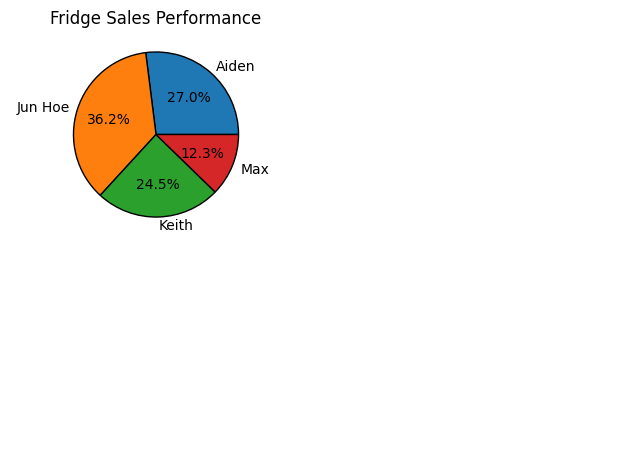

In [90]:
from matplotlib import pyplot as plt 

keys_list = [key for key in Dict_Sales]
values_list = [value['Sales_Amount'].sum() for value in Dict_Sales.values()]

fig1, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2)

ax1.pie(values_list, labels = keys_list, wedgeprops = {'edgecolor' : 'black'}, autopct = '%1.1f%%')
ax1.set_title("Fridge Sales Performance")
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')


plt.tight_layout()